## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.stats import norm, lognorm

import warnings
# warnings.filterwarnings('ignore')

In [2]:
print("Yfinance version: " , yf.__version__)

Yfinance version:  0.2.37


In [3]:
# Set default parameters for plt.title()
plt.rcParams['axes.titlepad'] = 12  # Set padding around the title
plt.rcParams['axes.titleweight'] = 'normal'  # Set title font size
plt.rcParams['axes.titlesize'] = 9  # Set title font size

## Fetch data

In [4]:
def fetch_stock_data(tickers, start_date, end_date, interval):
    data = yf.download(tickers, start=start_date, end=end_date, interval=interval)
    return data

In [5]:
# select tickers
tickers = ["BRK-B", "IAU", "MSFT", "META"] #, "GOOG", "AMZN", "AAPL", "TSM", "BAC", "WFC"]  #VALE, KO, JNJ, DG, DIS, SPY 

# date format YYYY-MM-DD
start_date = "2010-01-01"
end_date = "2024-02-01"

# time interval to take the cotations, in this case monthly
interval= "1d"

stock_data = fetch_stock_data(tickers, start_date, end_date, interval)

display(stock_data)

[*********************100%%**********************]  4 of 4 completed


Price        Adj Close                                          Close  \
Ticker           BRK-B        IAU        META        MSFT       BRK-B   
Date                                                                    
2010-01-04   66.220001  21.978001         NaN   23.431587   66.220001   
2010-01-05   66.540001  21.954000         NaN   23.439163   66.540001   
2010-01-06   66.199997  22.326000         NaN   23.295317   66.199997   
2010-01-07   66.459999  22.181999         NaN   23.053053   66.459999   
2010-01-08   66.440002  22.290001         NaN   23.212030   66.440002   
...                ...        ...         ...         ...         ...   
2024-01-25  380.850006  38.230000  392.763275  404.122681  380.850006   
2024-01-26  385.399994  38.180000  393.722260  403.184418  385.399994   
2024-01-29  383.179993  38.459999  400.594940  408.963715  383.179993   
2024-01-30  387.149994  38.509998  399.635986  407.835815  387.149994   
2024-01-31  383.739990  38.490002  389.726501  396.846130  383.739990   

Price                                                High             ...  \
Ticker            IAU        META        MSFT       BRK-B        IAU  ...   
Date                                                                  ...   
2010-01-04  21.978001         NaN   30.950001   66.500000  22.038000  ...   
2010-01-05  21.954000         NaN   30.959999   66.589996  22.084000  ...   
2010-01-06  22.326000         NaN   30.770000   66.500000  22.368000  ...   
2010-01-07  22.181999         NaN   30.450001   66.510002  22.264000  ...   
2010-01-08  22.290001         NaN   30.660000   66.480003  22.326000  ...   
...               ...         ...         ...         ...        ...  ...   
2024-01-25  38.230000  393.179993  404.869995  380.989990  38.320000  ...   
2024-01-26  38.180000  394.140015  403.929993  385.730011  38.270000  ...   
2024-01-29  38.459999  401.019989  409.720001  385.700012  38.509998  ...   
2024-01-30  38.509998  400.059998  408.589996  387.640015  38.770000  ...   
2024-01-31  38.490002  390.140015  397.579987  387.920013  38.900002  ...   

Price              Low                    Open                         \
Ticker            META        MSFT       BRK-B        IAU        META   
Date                                                                    
2010-01-04         NaN   30.590000   66.000000  21.978001         NaN   
2010-01-05         NaN   30.639999   66.389999  21.988001         NaN   
2010-01-06         NaN   30.520000   66.500000  22.156000         NaN   
2010-01-07         NaN   30.190001   66.199997  22.230000         NaN   
2010-01-08         NaN   30.240000   66.480003  22.306000         NaN   
...                ...         ...         ...        ...         ...   
2024-01-25  385.660004  402.529999  379.239990  38.270000  390.170013   
2024-01-26  391.589996  402.429993  381.049988  38.250000  394.350006   
2024-01-29  393.100006  404.329987  385.489990  38.459999  394.989990   
2024-01-30  399.570007  406.450012  383.239990  38.740002  403.589996   
2024-01-31  387.100006  397.209991  386.529999  38.669998  389.000000   

Price                    Volume                                 
Ticker            MSFT    BRK-B      IAU        META      MSFT  
Date                                                            
2010-01-04   30.620001  1575000  1185000         NaN  38409100  
2010-01-05   30.850000  1310000   936000         NaN  49749600  
2010-01-06   30.879999  1760000  1091000         NaN  58182400  
2010-01-07   30.629999  1505000   811500         NaN  50559700  
2010-01-08   30.280001  1500000   737000         NaN  51197400  
...                ...      ...      ...         ...       ...  
2024-01-25  404.320007  4055800  4637800  15091100.0  21021200  
2024-01-26  404.369995  3621400  3288100  13163700.0  17803300  
2024-01-29  406.059998  3797400  3503900  18742400.0  24510200  
2024-01-30  412.260010  3090900  4125600  18614700.0  33477600  
2024-01-31  406.959991  385640

In [6]:
# select only the closing price
df_close = stock_data.Close.copy()
# df_close.info()
df_close.head(3)

Ticker,BRK-B,IAU,META,MSFT
Date,,,,
2010-01-04,66.220001,21.978001,NaN,30.950001
2010-01-05,66.540001,21.954000,NaN,30.959999
2010-01-06,66.199997,22.326000,NaN,30.770000


In [7]:
# find the 
df_daily_return = (df_close
                   .copy()
                   .pct_change(periods=1)
                   .dropna()
)

# display(cov_yoy.describe())
df_daily_return.head(3)

Ticker,BRK-B,IAU,META,MSFT
Date,,,,
2012-05-21,0.011279,0.001289,-0.109861,0.016399
2012-05-22,-0.001880,-0.017386,-0.089039,0.000336
2012-05-23,0.001255,-0.002621,0.032258,-0.021841


## Covariance

### Calculation (YoY)

In [8]:
# find the 
cov_yoy = (df_close
             .copy()
             .pct_change(periods=1)
             .dropna()
             .rolling(window=252)
             .cov()
             .dropna()
             .apply(lambda x: 252 * x)
)

# display(cov_yoy.describe())
cov_yoy

Ticker                BRK-B       IAU      META      MSFT
Date       Ticker                                        
2013-05-22 BRK-B   0.019296  0.003820  0.010353  0.013321
           IAU     0.003820  0.029364  0.001898  0.004233
           META    0.010353  0.001898  0.302401  0.002140
           MSFT    0.013321  0.004233  0.002140  0.043017
2013-05-23 BRK-B   0.019239  0.003667  0.011455  0.013255
...                     ...       ...       ...       ...
2024-01-30 MSFT    0.007005  0.000949  0.052678  0.056846
2024-01-31 BRK-B   0.018303 -0.002003  0.016079  0.007122
           IAU    -0.002003  0.017211 -0.004966  0.000893
           META    0.016079 -0.004966  0.153828  0.052677
           MSFT    0.007122  0.000893  0.052677  0.057112

[10768 rows x 4 columns]

In [9]:
cov_yoy[(cov_yoy.index.get_level_values('Ticker') == tickers[0])].head(3)

,Ticker,BRK-B,IAU,META,MSFT
Date,Ticker,,,,
2013-05-22,BRK-B,0.019296,0.003820,0.010353,0.013321
2013-05-23,BRK-B,0.019239,0.003667,0.011455,0.013255
2013-05-24,BRK-B,0.019259,0.003642,0.011330,0.013238


In [10]:
cov11 = cov_yoy[(cov_yoy.index.get_level_values('Ticker') == tickers[0])][tickers[0]].values
cov12 = cov_yoy[(cov_yoy.index.get_level_values('Ticker') == tickers[0])][tickers[1]].values
# cov21 = cov12
cov22 = cov_yoy[(cov_yoy.index.get_level_values('Ticker') == tickers[1])][tickers[1]].values

### Plots

#### Normal:

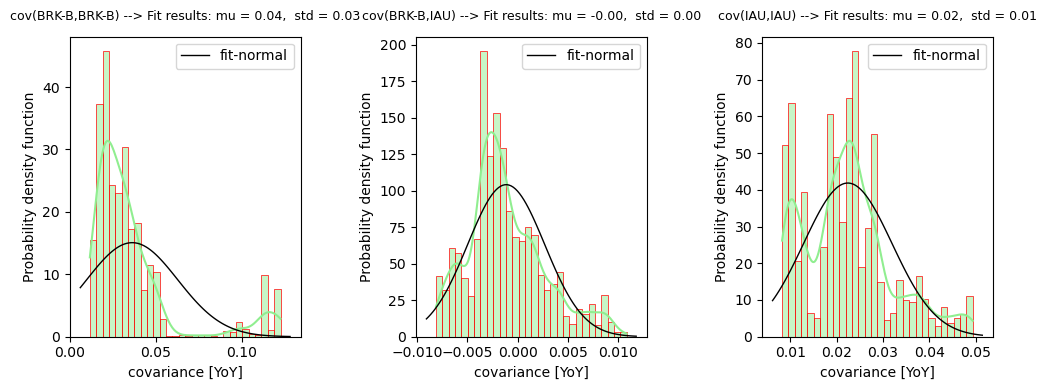

In [11]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Fit a Gaussian distribution to the YoY covariance
plt.subplot(1, 3, 1)
mu, std = norm.fit(cov11)
sns.histplot(data= cov11, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
plt.title(f"cov({tickers[0]},{tickers[0]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.ylabel("Probability density function")
plt.xlabel("covariance [YoY]")
plt.legend()

# Fit a Gaussian distribution to the YoY covariance
plt.subplot(1, 3, 2)
mu, std = norm.fit(cov12)
sns.histplot(data= cov12, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
plt.title(f"cov({tickers[0]},{tickers[1]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.ylabel("Probability density function")
plt.xlabel("covariance [YoY]")
plt.legend()

# Fit a Gaussian distribution to the YoY covariance
plt.subplot(1, 3, 3)
mu, std = norm.fit(cov22)
sns.histplot(data= cov22, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
plt.title(f"cov({tickers[1]},{tickers[1]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.ylabel("Probability density function")
plt.xlabel("covariance [YoY]")
plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

#### Lognormal:

C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


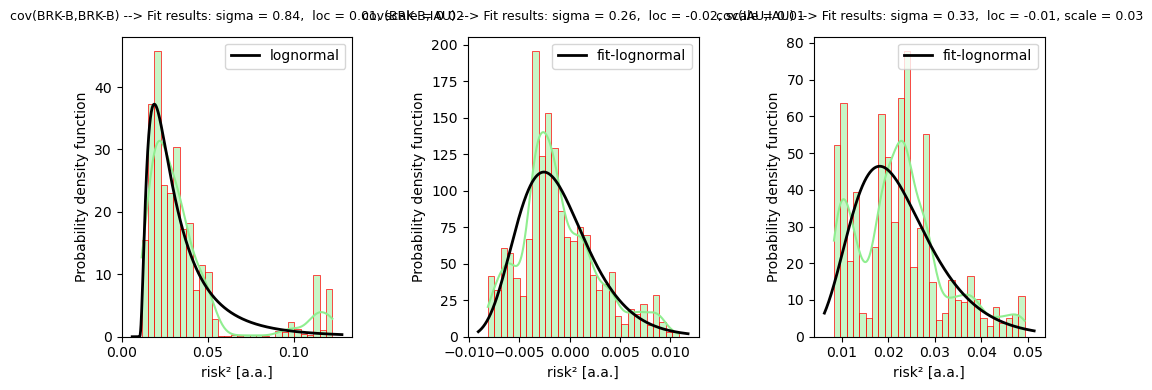

In [12]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Fit a Lognormal distribution to theYoY covariance
plt.subplot(1, 3, 1)
sigma, loc, scale = lognorm.fit(cov11)

sns.histplot(data= cov11, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', label="lognormal", linewidth=2)
plt.title(f"cov({tickers[0]},{tickers[0]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Probability density function")
plt.xlabel("risk² [a.a.]")
plt.legend()


# Fit a Lognormal distribution to theYoY covariance
plt.subplot(1, 3, 2)
sigma, loc, scale = lognorm.fit(cov12)

sns.histplot(data= cov12, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', label="fit-lognormal", linewidth=2)
plt.title(f"cov({tickers[0]},{tickers[1]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Probability density function")
plt.xlabel("risk² [a.a.]")
plt.legend()

# Fit a Lognormal distribution to theYoY covariance
plt.subplot(1, 3, 3)
sigma, loc, scale = lognorm.fit(cov22)

sns.histplot(data= cov22, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', label="fit-lognormal", linewidth=2)
plt.title(f"cov({tickers[1]},{tickers[1]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Probability density function")
plt.xlabel("risk² [a.a.]")
plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

## Correlation

### Calculation (YoY)

In [13]:
# find the covelation yoy
corr_yoy = (df_close
            .copy()
            .pct_change(periods=1)
            .dropna()
            .rolling(window=252)
            .corr()
            .dropna()
            # .apply(lambda x: x + 1.0)
)

# display(cov_yoy.describe())
corr_yoy

Ticker                BRK-B       IAU      META      MSFT
Date       Ticker                                        
2013-05-22 BRK-B   1.000000  0.160458  0.135531  0.462370
           IAU     0.160458  1.000000  0.020138  0.119111
           META    0.135531  0.020138  1.000000  0.018759
           MSFT    0.462370  0.119111  0.018759  1.000000
2013-05-23 BRK-B   1.000000  0.153164  0.153232  0.461032
...                     ...       ...       ...       ...
2024-01-30 MSFT    0.217437  0.030328  0.562618  1.000000
2024-01-31 BRK-B   1.000000 -0.112832  0.303019  0.220287
           IAU    -0.112832  1.000000 -0.096510  0.028471
           META    0.303019 -0.096510  1.000000  0.562004
           MSFT    0.220287  0.028471  0.562004  1.000000

[10768 rows x 4 columns]

In [14]:
corr_yoy[(corr_yoy.index.get_level_values('Ticker') == tickers[0])].head(3)

,Ticker,BRK-B,IAU,META,MSFT
Date,Ticker,,,,
2013-05-22,BRK-B,1.0,0.160458,0.135531,0.462370
2013-05-23,BRK-B,1.0,0.153164,0.153232,0.461032
2013-05-24,BRK-B,1.0,0.152707,0.153335,0.460167


In [15]:
corr11 = corr_yoy[(corr_yoy.index.get_level_values('Ticker') == tickers[0])][tickers[0]].values
corr12 = corr_yoy[(corr_yoy.index.get_level_values('Ticker') == tickers[0])][tickers[1]].values
# corr21 = corr12
corr22 = corr_yoy[(corr_yoy.index.get_level_values('Ticker') == tickers[1])][tickers[1]].values

### Plots

#### Normal:

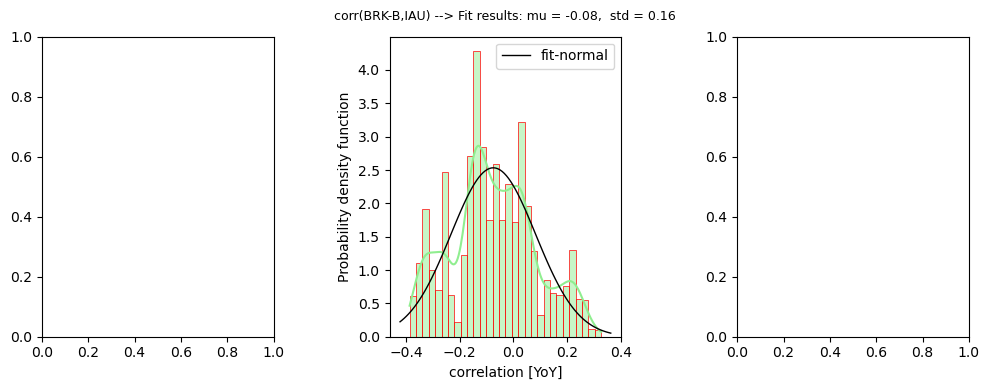

In [16]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Fit a Gaussian distribution to the YoY corrariance
plt.subplot(1, 3, 1)
# mu, std = norm.fit(corr11)
# sns.histplot(data= corr11, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)

# plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
# plt.title(f"corr({tickers[0]},{tickers[0]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
# plt.ylabel("Probability density function")
# plt.xlabel("correlation [YoY]")
# plt.legend()

# Fit a Gaussian distribution to the YoY corrariance
plt.subplot(1, 3, 2)
mu, std = norm.fit(corr12)
sns.histplot(data= corr12, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
plt.title(f"corr({tickers[0]},{tickers[1]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.ylabel("Probability density function")
plt.xlabel("correlation [YoY]")
plt.legend()

# Fit a Gaussian distribution to the YoY corrariance
plt.subplot(1, 3, 3)
# mu, std = norm.fit(corr22)
# sns.histplot(data= corr22, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)

# plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
# plt.title(f"corr({tickers[1]},{tickers[1]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
# plt.ylabel("Probability density function")
# plt.xlabel("correlation [YoY]")
# plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

#### Lognormal:

C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


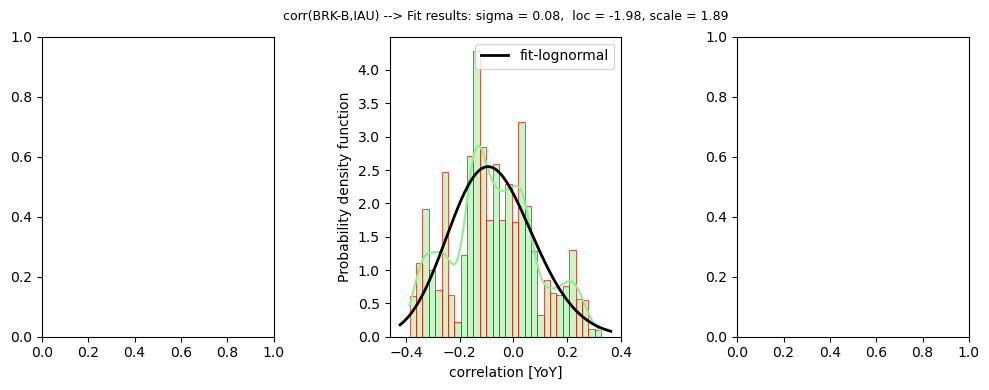

In [17]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Fit a Lognormal distribution to theYoY corrariance
plt.subplot(1, 3, 1)
# sigma, loc, scale = lognorm.fit(corr11)

# sns.histplot(data= corr11, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 1000)
# pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

# plt.plot(x, pdf, 'k', label="lognormal", linewidth=2)
# plt.title(f"corr({tickers[0]},{tickers[0]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
# plt.ylabel("Probability density function")
# plt.xlabel("correlation [YoY]")
# plt.legend()


# Fit a Lognormal distribution to theYoY corrariance
plt.subplot(1, 3, 2)
sigma, loc, scale = lognorm.fit(corr12)

sns.histplot(data= corr12, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', label="fit-lognormal", linewidth=2)
plt.title(f"corr({tickers[0]},{tickers[1]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Probability density function")
plt.xlabel("correlation [YoY]")
plt.legend()

# Fit a Lognormal distribution to theYoY corrariance
plt.subplot(1, 3, 3)
# sigma, loc, scale = lognorm.fit(corr22)

# sns.histplot(data= corr22, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 1000)
# pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

# plt.plot(x, pdf, 'k', label="fit-lognormal", linewidth=2)
# plt.title(f"corr({tickers[1]},{tickers[1]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
# plt.ylabel("Probability density function")
# plt.xlabel("correlation [YoY]")
# plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

## Monte carlo simulation

### Equations:
<br>

- **Portfolio Return**:
<br>
$$ R_P = {\omega}^T \cdot R $$
<br>
with $R_P$ being the return of the portfolio, $\omega$ the weights and $R$ the returns of the assets. Each one are given by:
<br><br>

<table>
  <tr>
    <td>
      $$
        \omega = \begin{bmatrix}
                {\omega}_A \\
                {\omega}_B \\
                {\omega}_C \\
        \end{bmatrix},
      $$
    </td>
    <td>
      and
    </td>
    <td>
    $$
        R = \begin{bmatrix}
                R_A \\
                R_B \\
                R_C \\
        \end{bmatrix}.
    $$
    </td>
  </tr>
</table>

<br>

- **Portfolio Risk**: 
<br>
$$ {{\sigma}^2_P} = {\omega}^T \cdot \Sigma \cdot \omega $$
<br>
in wich ${{\sigma}^2_P}$ is the variance of the portfolio and $\Sigma$ is the covariance matrix of the assets. The covariance matrix is given by:
<br>
<br>
$$ \Sigma = \begin{bmatrix}
                {{\sigma}^2_A} & cov(A,B) & cov(A,C) \\
                cov(A,B) & {{\sigma}^2_B} & cov(B,C) \\
                cov(A,C) & cov(B,C) & {{\sigma}^2_C} \\
            \end{bmatrix}.
$$
<br>




## Generate samples from distributions models - Covariance

#### Cov pairs

In [18]:
# Number of samples
num_samples = 1_000

In [19]:
# Generate all pairs of assets for covariance matrix
def generate_cov_pairs():    
    ticker_pairs1 = [(tickers[i], tickers[j]) for i in range(len(tickers)) for j in range(i, len(tickers))]
    ticker_pairs2 = [(j,i) for i,j in ticker_pairs1]
    pairs = set(ticker_pairs1).union(set(ticker_pairs2))
    
    ticker_map = dict(zip(tickers, range(0, len(tickers))))
    
    return pairs, ticker_map

cov_pairs, ticker_map = generate_cov_pairs()

#### Cov fitting params

In [20]:
# Empty dict to receive the parameters
cov_fitting_params = {}

for i, j in cov_pairs:
    
    if i == j:
        
        df = (df_daily_return[[i]]
              .copy()
              .rolling(window=252)
              .var()
              .dropna()
              .apply(lambda x: 252 * x)
            )
        
        sigma, loc, scale = lognorm.fit(df)
        cov_fitting_params[(i,j)] = {"sigma": sigma, "loc": loc, "scale": scale}

    else:
        
        df = (df_daily_return[[i,j]]
              .copy()
              .rolling(window=252)
              .cov()
              .dropna()
              .apply(lambda x: 252 * x)
            )
    
        cov_ij = df[(df.index.get_level_values('Ticker') == i)][j]
    
        sigma, loc, scale = lognorm.fit(cov_ij)    
        cov_fitting_params[(i,j)] = {"sigma": sigma, "loc": loc, "scale": scale}
    
# cov_fitting_params


C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\DELL\anaconda3\Lib\site-p

#### Cov samples

In [21]:
def calculate_cov_samples(cvp, num_samples=1_000):
    sigma   = cov_fitting_params[cvp]["sigma"]
    loc     = cov_fitting_params[cvp]["loc"]
    scale   = cov_fitting_params[cvp]["scale"]
    samples = lognorm.rvs(sigma, loc=loc, scale=scale, size=num_samples, random_state=42)  
    return samples

In [22]:
# Defining return dict to receive the samples from distributions models builted with their respective parameters
cov_samples_lognormal = { cvp: calculate_cov_samples(cvp, num_samples) for cvp in cov_pairs }

# Reshaping from (num_samples,) --> (num_samples, 1, 1)
cov_samples_reshaped  = { cvp: cov_samples_lognormal[cvp].reshape(num_samples, 1, 1) for cvp in cov_samples_lognormal.keys() }

# Indexes index array to keys with respective samples, ex.: (BRK-B, IAU) --> (0, 1) 
cov_samples_mapped     = {(ticker_map[i], ticker_map[j]): cov_samples_reshaped[(i,j)] for i, j in cov_samples_reshaped.keys() } 


## Build Cov matrix

In [23]:
# Create empty array with the final shape
cov_matrix = np.zeros((num_samples, len(tickers), len(tickers)), dtype=np.float64)

# Map the values in the dictionary to the new array
for (i, j), arr in cov_samples_mapped.items():    
    cov_matrix[:, i, j] = arr[:, 0, 0]


In [24]:
cov_matrix.shape

(1000, 4, 4)

In [25]:
cov_matrix[500,:,:]

array([[0.04966204, 0.00219543, 0.04221523, 0.04155494],
       [0.00219543, 0.03072714, 0.00657874, 0.00691861],
       [0.04221523, 0.00657874, 0.1032174 , 0.08429365],
       [0.04155494, 0.00691861, 0.08429365, 0.23111766]])